In [218]:
print('recall= 0.5101125057, accuracy =0.7179985721')

recall= 0.5101125057, accuracy =0.7179985721


# Modelo 1 de procesamiento de datos

## 1. Análisis exploratorio de los datos

In [196]:
#Importando las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [186]:
#Cargando archivo  de test
data_test = pd.read_csv('./properties_colombia_test.csv')
data_test.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,...,3.0,660.0,350.0,COP,NaN,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,...,3.0,NaN,NaN,COP,Mensual,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY
2,119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,...,1.0,NaN,NaN,COP,NaN,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)
3,227304,RUV1P+3UOmNdlJ9fBdWFyw==,Propiedad,2020-12-10,9999-12-31,2020-12-10,6.203000,-75.556000,Colombia,Antioquia,...,NaN,2793.0,NaN,COP,NaN,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta,POINT (-75.556 6.203)
4,228600,ifKutEAhyovuDNeYrFFV+A==,Propiedad,2020-12-10,2020-12-11,2020-12-10,NaN,NaN,Colombia,Antioquia,...,2.0,NaN,NaN,COP,NaN,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta,POINT EMPTY


In [86]:
# Lectura del archivo de Train
data_train = pd.read_csv('./properties_colombia_train.csv')
data_train.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


In [87]:
#Información estáditica de las variables
data_test.describe()

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,65850.000000,49433.000000,49433.000000,9110.000000,13403.000000,52054.000000,2314.000000,3.305000e+03
mean,500260.289263,5.686868,-75.042164,3.282327,3.236813,2.639624,1355.283924,5.616338e+03
std,290438.140244,2.217177,1.098202,1.702092,1.972357,1.426015,9409.882547,3.012933e+05
min,4.000000,-4.203165,-81.705052,1.000000,0.000000,1.000000,10.000000,1.000000e+00
25%,235030.500000,4.582000,-75.644727,3.000000,3.000000,2.000000,74.000000,7.100000e+01
50%,509299.500000,4.918677,-75.476071,3.000000,3.000000,2.000000,120.000000,1.150000e+02
75%,772024.500000,6.251822,-74.094765,4.000000,4.000000,3.000000,274.500000,2.130000e+02
max,993559.000000,13.338761,-67.924336,40.000000,60.000000,20.000000,200000.000000,1.732000e+07


In [88]:
# Verificando la dimensión de los datos de test
data_test.shape

(65850, 26)

In [89]:
# Verificando medidas estadíticas del archivo de train
data_train.describe()

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,197549.000000,148051.000000,148051.000000,27537.000000,40525.000000,156467.000000,6974.000000,9.802000e+03,1.974860e+05
mean,497437.843851,5.666001,-75.041045,3.291208,3.239062,2.639279,1352.132349,9.483356e+02,6.436051e+08
std,290023.578338,2.196804,1.104575,1.754795,1.985636,1.437174,7713.769352,3.730875e+04,1.944868e+09
min,0.000000,-32.787342,-119.698190,1.000000,0.000000,1.000000,10.000000,1.000000e+00,0.000000e+00
25%,234211.000000,4.582315,-75.645126,3.000000,3.000000,2.000000,72.000000,7.100000e+01,2.000000e+08
50%,507385.000000,4.908611,-75.476654,3.000000,3.000000,2.000000,120.000000,1.140000e+02,3.300000e+08
75%,770037.000000,6.248101,-74.094001,4.000000,4.000000,3.000000,281.000000,2.160000e+02,6.000000e+08
max,993551.000000,34.420334,-67.482570,40.000000,96.000000,20.000000,180000.000000,3.480000e+06,3.450000e+11


In [90]:
# Obteniendo dimenciones del dataset y media del precio antes de procesar los datos
print('La dimensión de los datos de train es: ', data_train.shape)
data_train_mean = data_train['price'].mean()
print('La media del precio de los datos es: ', data_train_mean)


La dimensión de los datos de train es:  (197549, 27)
La media del precio de los datos es:  643605091.0064613


In [91]:
# Verificando el tipo de variables en los datasets

#data_test.dtypes
data_train.dtypes

Unnamed: 0           int64
id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
l4                  object
l5                  object
l6                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
geometry            object
dtype: object

In [92]:
data_train['ad_type'].value_counts()

Propiedad    197549
Name: ad_type, dtype: int64

In [93]:
data_train['currency'].value_counts()

COP    197474
USD         8
Name: currency, dtype: int64

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'surface_total'}>,
        <AxesSubplot:title={'center':'surface_covered'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

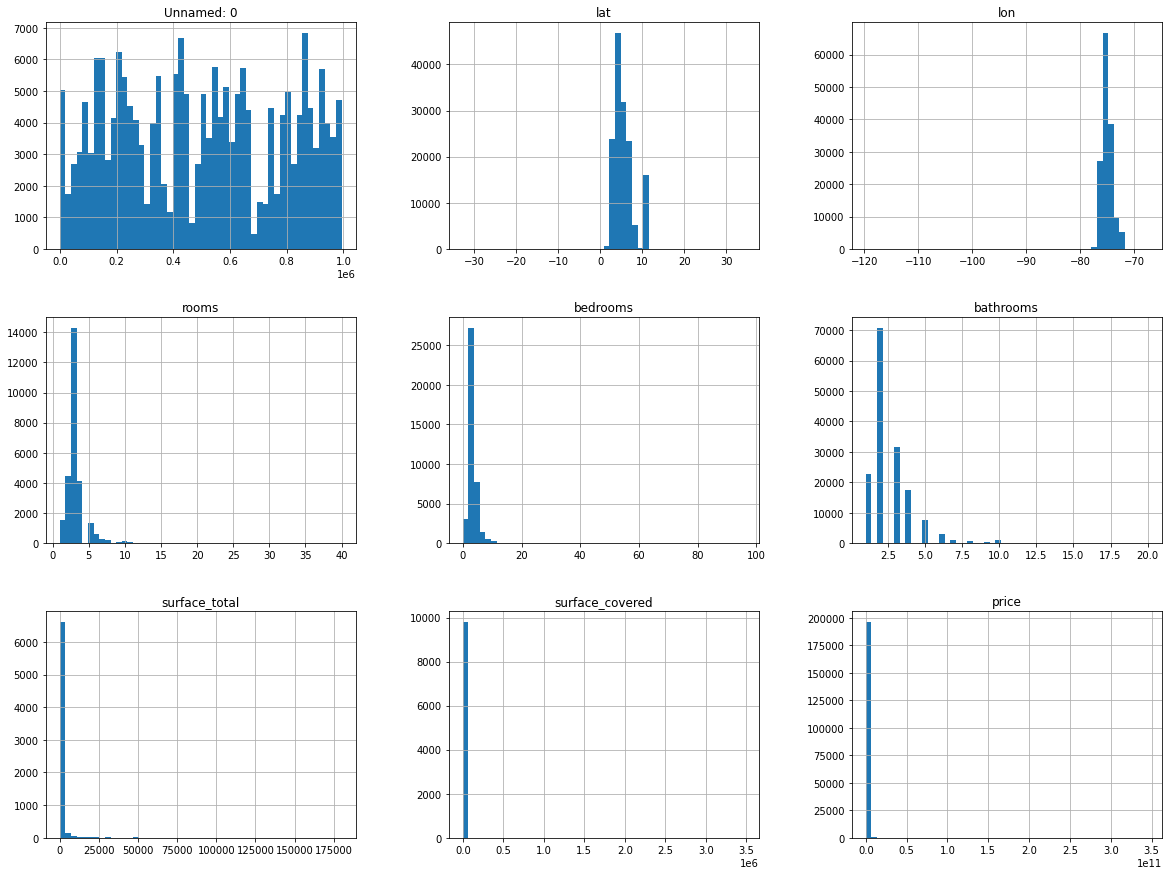

In [94]:
# Graficando las variables numéricas para verificar su distribución
data_train.hist(bins = 50, figsize =(20,15))

Verificamos si tenemos datos duplicados

In [95]:
data_train[data_train.duplicated()]
print('La cantidad de registros duplicados es:', data_train.duplicated().sum())

La cantidad de registros duplicados es: 0


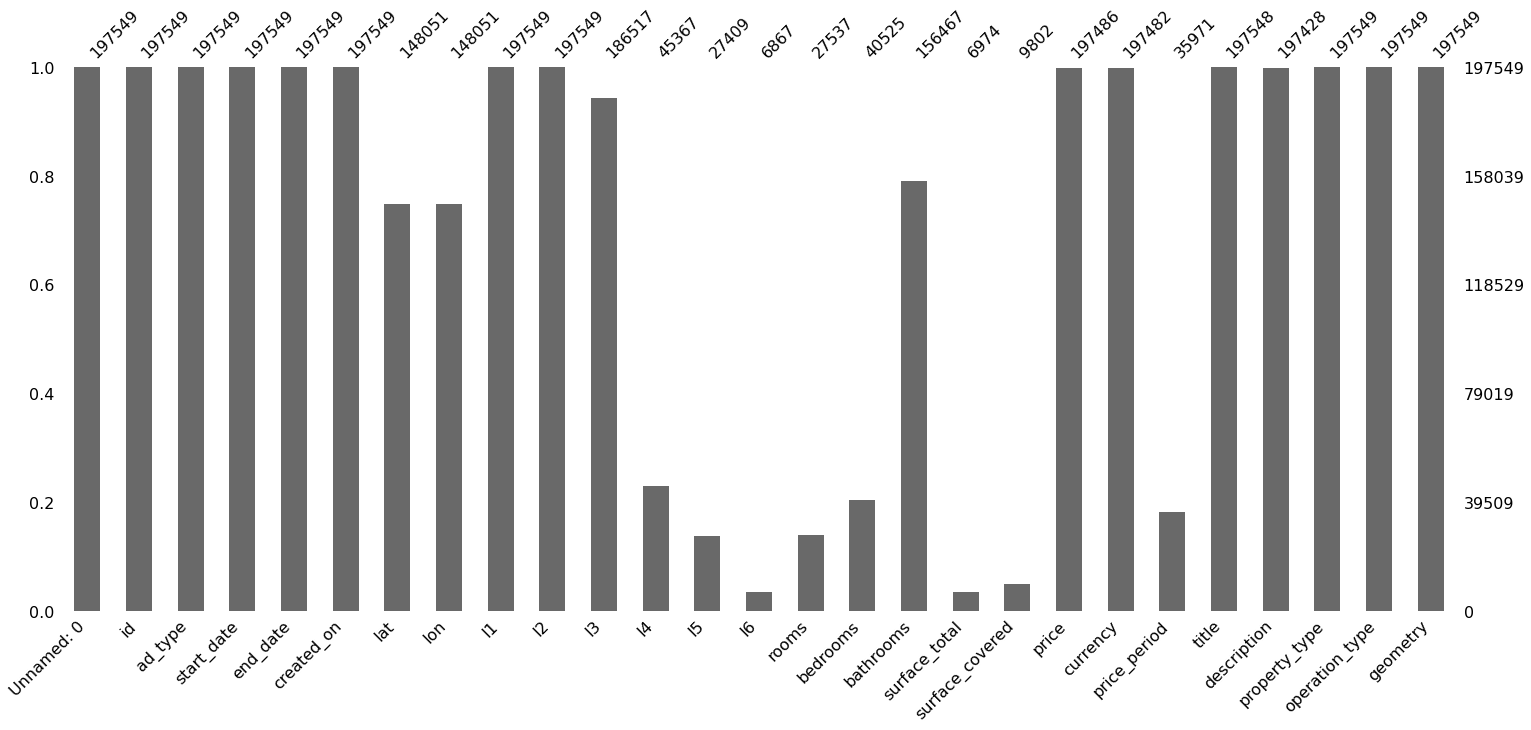

In [15]:
# Graficando valores faltantes
import missingno as msno
msno.bar(data_train)
plt.show()

Obteniendo porcentajes de valores faltantes de algunas columnas que no cuentan con el total de datos

In [96]:
#Obteniendo porcentajes de valores faltantes de las columnas que no cuentan con el total de datos
print('Porcentaje de valores faltantes de la variable l3:', (data_train.l3.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la variable l4:', (data_train.l4.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la variable l5:', (data_train.l5.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la variable l6:', (data_train.l6.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la variable rooms:', (data_train.rooms.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la variable  bathrooms:', (data_train.bathrooms.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la variable bedrooms:', (data_train.bedrooms.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la surface_covered:', (data_train.surface_covered.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la surface_total:', (data_train.surface_total.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la price_period:', (data_train.price_period.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la variable lat:', (data_train.lat.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la variable lon:', (data_train.lon.isnull().sum()/len(data_train)) * 100)

Porcentaje de valores faltantes de la variable l3: 5.584437278852335
Porcentaje de valores faltantes de la variable l4: 77.03506471812057
Porcentaje de valores faltantes de la variable l5: 86.12546760550546
Porcentaje de valores faltantes de la variable l6: 96.52390039939458
Porcentaje de valores faltantes de la variable rooms: 86.06067355440928
Porcentaje de valores faltantes de la variable  bathrooms: 20.795853180729846
Porcentaje de valores faltantes de la variable bedrooms: 79.48610218224339
Porcentaje de valores faltantes de la surface_covered: 95.03819305590005
Porcentaje de valores faltantes de la surface_total: 96.46973662230637
Porcentaje de valores faltantes de la price_period: 81.79135303139981
Porcentaje de valores faltantes de la variable lat: 25.05606204030392
Porcentaje de valores faltantes de la variable lon: 25.05606204030392


Mapeando las coordenadas de los datos para detectar posible outliers

<AxesSubplot:xlabel='lon', ylabel='lat'>

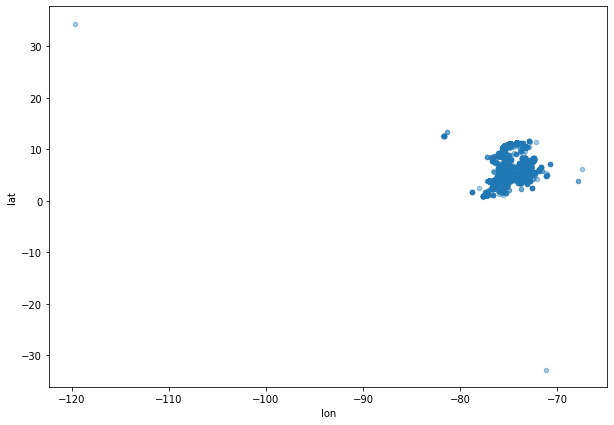

In [97]:
# Mapeamos las coordenadas, detectamos que se localizan puntos muy alejados, que podrian ser aproximadamente 8 datos
data_train.plot(kind= 'scatter', x = 'lon', y ='lat', alpha= 0.4, figsize= (10,7))

Verificando si las coordenadas corresponden al país correspondiente

In [64]:
# Algunas librerias extra que usaremos
from matplotlib.colors import Normalize
import matplotlib.colors as colors
from numpy import array
from numpy import max

# Aqui cargamos Basemap
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [65]:
# Creamos la lista de latitudes y longitudes.
lats, lons = list(data_train['lat']), list(data_train['lon'])

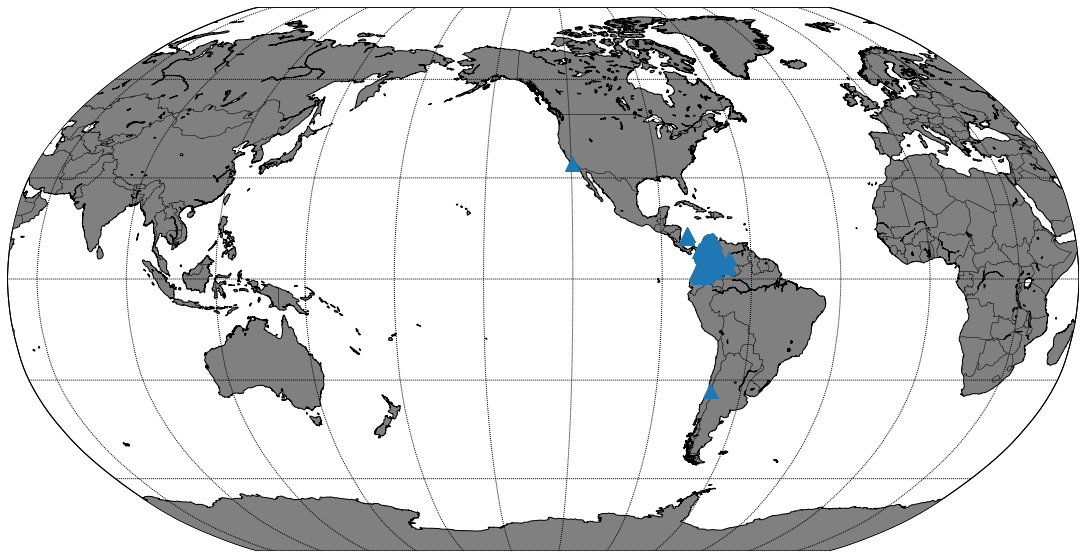

In [66]:
## Graficando los puntos de las propiedades en el mapa
figu, ax = plt.subplots(figsize=(20,10))
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
x,y = eq_map(lons, lats)
eq_map.plot(x, y, '^', markersize= 15)

Verificamos la correlacion entre nuestras variables

<AxesSubplot:>

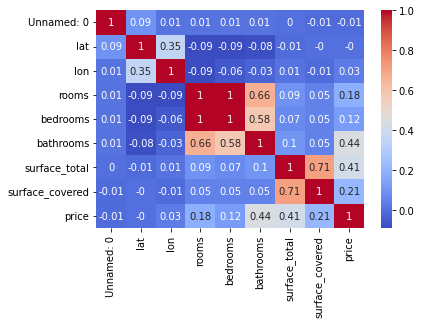

In [98]:
# obteniedno la matriz de correlación
corrMatrix = data_train.corr().round(2)
sn.heatmap(corrMatrix, annot = True, cmap = 'coolwarm')

## 2. Preparando datos y aplicando transformaciones

In [99]:
# Verificamos los valores nulos
data_train.isnull().values.any()

True

Se decidio eliminar las columnas con la mayor cantidad de valores faltantes, debido a que faltaban datos que pudieran imputarse a pesar de tener buena correlación, como es el caso de las variables de superficie. Se baja la dimencionalidad de 28 a 20 columnas.

In [100]:
print('Porcentaje de valores faltantes de la variable l4:', (data_train.l4.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la variable l5:', (data_train.l5.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la variable l6:', (data_train.l6.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la variable rooms:', (data_train.rooms.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la variable bedrooms:', (data_train.bedrooms.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la surface_covered:', (data_train.surface_covered.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la surface_total:', (data_train.surface_total.isnull().sum()/len(data_train)) * 100)
print('Porcentaje de valores faltantes de la price_period:', (data_train.price_period.isnull().sum()/len(data_train)) * 100)

Porcentaje de valores faltantes de la variable l4: 77.03506471812057
Porcentaje de valores faltantes de la variable l5: 86.12546760550546
Porcentaje de valores faltantes de la variable l6: 96.52390039939458
Porcentaje de valores faltantes de la variable rooms: 86.06067355440928
Porcentaje de valores faltantes de la variable bedrooms: 79.48610218224339
Porcentaje de valores faltantes de la surface_covered: 95.03819305590005
Porcentaje de valores faltantes de la surface_total: 96.46973662230637
Porcentaje de valores faltantes de la price_period: 81.79135303139981


In [101]:
#Eliminamos columnas con alto número de valores faltantes
data_train.drop(columns = 'l4', inplace = True)
data_train.drop(columns = 'l5', inplace = True)
data_train.drop(columns = 'l6', inplace = True)
data_train.drop(columns = 'rooms', inplace = True)
data_train.drop(columns = 'bedrooms', inplace = True)
data_train.drop(columns = 'surface_covered', inplace = True)
data_train.drop(columns = 'surface_total', inplace = True)
data_train.drop(columns = 'price_period', inplace = True)

In [ ]:
# Verificamos la columna ad_type, primero verificamos si hay hay valores falltantes
print('Porcentaje de valores faltantes de la variable ad_type:', (data_train.ad_type.isnull().sum()/len(data_train))*100)

In [103]:
data_train.ad_type.value_counts()

Propiedad    197549
Name: ad_type, dtype: int64

Debido a que solo se presenta un solo valor en la columna se eliminara, ya que no contiene datos significativos que afecten el modelo

In [104]:
data_train.drop(columns = 'ad_type', inplace = True)

Se normalizara el formato de las fechas

In [105]:
#Cambiamos el tipo de dato para poder , realizar los cambios necesario a la columna
data_train['end_date']= data_train['end_date'].astype(str)

In [106]:
data_train['end_date'] = data_train['end_date'].replace( '9999-12-31', '2020-12-31')


In [107]:
data_train['end_date'] 

0         2020-12-31
1         2021-05-14
2         2020-08-20
3         2020-11-30
4         2020-10-07
             ...    
197544    2020-12-31
197545    2020-12-09
197546    2021-01-02
197547    2020-08-14
197548    2020-11-27
Name: end_date, Length: 197549, dtype: object

In [108]:
# Verificamos valores faltantes

print('Porcentaje de valores faltantes de la variable star_date:', (data_train.start_date.isnull().sum()/len(data_train))*100)
print('Porcentaje de valores faltantes de la variable end_date:', (data_train.end_date.isnull().sum()/len(data_train))*100)
print('Porcentaje de valores faltantes de la variable created_on:', (data_train.created_on.isnull().sum()/len(data_train))*100)

Porcentaje de valores faltantes de la variable star_date: 0.0
Porcentaje de valores faltantes de la variable end_date: 0.0
Porcentaje de valores faltantes de la variable created_on: 0.0


Análizamos las columnas que tiene que ver con la localización de la propiedad l1, l2 y l3

In [109]:
# Para la descripción de la localización de país
data_train.l1.value_counts()

Colombia    197549
Name: l1, dtype: int64

In [110]:
print('Porcentaje de valores faltantes de la variable l1:', (data_train.l1.isnull().sum()/len(data_train))*100)

Porcentaje de valores faltantes de la variable l1: 0.0


In [111]:
#Debido a que no contiene información relevante no se tomara en cuenta esta columna y se eliminara, su unico valor es Colombia
data_train.drop(columns = 'l1', inplace = True)

In [112]:
# Para la columna l2 que  tiene que ver con la provincia
# print('Porcentaje de valores faltantes de la variable l2:', (data_train.l2.isnull().sum()/len(data_train))*100)  ##cero valores nulos
data_train.l2.value_counts() ## se aplicara un a transformación a datos categorticos más adelante

Antioquia                                  60636
Cundinamarca                               38841
Valle del Cauca                            26925
Caldas                                     16131
Atlántico                                  15828
Santander                                   9629
Risaralda                                   6982
Norte de Santander                          5223
Quindío                                     3362
Bolívar                                     2766
Cauca                                       2424
Tolima                                      2357
Meta                                        2316
Magdalena                                   1268
Huila                                        831
Nariño                                       651
Boyacá                                       434
Casanare                                     382
Cesar                                        179
Córdoba                                      169
Sucre               

In [113]:
#  Para la columna l3 que  tiene que ver con la ciudad
print('Porcentaje de valores faltantes de la variable l3:', (data_train.l3.isnull().sum()/len(data_train))*100)  ##cero valores nulos


Porcentaje de valores faltantes de la variable l3: 5.584437278852335


In [114]:
data_train.l3.value_counts() ## se aplicara un a transformación a datos categorticos más adelante

Medellín         43404
Bogotá D.C       28731
Cali             20846
Barranquilla     15133
Manizales        14128
                 ...  
Circasia             1
Sibaté               1
Maní                 1
Vianí                1
Quebradanegra        1
Name: l3, Length: 293, dtype: int64

In [115]:
# Se agregara una etiqueta que indique NA en los valores nulos
data_train.l3.replace(np.nan, 'NA', inplace = True)

In [116]:
#Verificamos los cambios  realizados
print('Porcentaje de valores faltantes de la variable l3:', (data_train.l3.isnull().sum()/len(data_train))*100)

Porcentaje de valores faltantes de la variable l3: 0.0


In [117]:
#Verificamos cantidad de valores faltantes para la columna price
print('Porcentaje de valores faltantes de la variable price:', (data_train.price.isnull().sum()/len(data_train))*100)

Porcentaje de valores faltantes de la variable price: 0.03189082202390293


In [118]:
# Se decide llenar con la media de los datos
from sklearn.impute import SimpleImputer

# Definimos, en strategy, la estrategia que usaremos para la imputación. En este caso, utilizamos una medida de tendencia central.
# Más específicamente, la media

imputer = SimpleImputer(strategy = 'mean')

In [119]:
imputer.fit(data_train[['price']])

data_train['price'] = imputer.transform(data_train[['price']])

In [120]:
#Verificamos los cambios  realizados
print('Porcentaje de valores faltantes de la variable price:', (data_train.price.isnull().sum()/len(data_train))*100)

Porcentaje de valores faltantes de la variable price: 0.0


In [121]:
# Para la columna currrency verificamos la cantidad de valores nulos
print('Porcentaje de valores faltantes de la variable currency:', (data_train.currency.isnull().sum()/len(data_train))*100)

Porcentaje de valores faltantes de la variable currency: 0.033915636120658677


In [122]:
#Se verifican los diferentes valores que se puede tener en las filas
data_train.currency.value_counts()


COP    197474
USD         8
Name: currency, dtype: int64

In [123]:
#Número de filas en la columna
data_train.currency.shape

(197549,)

In [124]:
# Se decide eliminar la columna, ya que no proporciona información significativa.
data_train.drop(columns = 'currency', inplace = True)

In [125]:
data_train.head(2)
# property_type
# operation_type

,Unnamed: 0,id,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,price,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,2020-12-14,2020-12-31,2020-12-14,6.203000,-75.572000,Antioquia,Medellín,4.0,9.000000e+09,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Cundinamarca,Bogotá D.C,2.0,6.250000e+08,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)


In [126]:
#Analizando la columna property_type
print('Porcentaje de valores faltantes de la variable property_type:', (data_train.property_type.isnull().sum()/len(data_train))*100)

Porcentaje de valores faltantes de la variable property_type: 0.0


In [127]:
#Se verifican los diferentes valores que se puede tener en las filas
data_train.property_type.value_counts()


Apartamento        100527
Casa                60500
Otro                16530
Lote                16507
Local comercial      1255
Finca                1135
Oficina              1085
Parqueadero            10
Name: property_type, dtype: int64

In [128]:
#Analizando la columna operation_type
print('Porcentaje de valores faltantes de la variable operation_type:', (data_train.operation_type.isnull().sum()/len(data_train))*100)

Porcentaje de valores faltantes de la variable operation_type: 0.0


In [129]:
#Se verifican los diferentes valores que se puede tener en las filas
data_train.operation_type.value_counts()

Venta    197549
Name: operation_type, dtype: int64

In [130]:
# Debido a que la la columna operation_type solo tiene un valor se desestima la columna y se elimina
data_train.drop(columns = 'operation_type', inplace = True)

In [131]:
# Al analizar el contenido y la información de las columnas title, descriptiony geometry
# se deciden eliminar estos datos
data_train.drop(columns = 'title', inplace = True)
data_train.drop(columns = 'description', inplace = True)
data_train.drop(columns = 'geometry', inplace = True)


Tranformando las variables categoricas en numéricas

In [132]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
data_train['l2'] = label_encoder.fit_transform(data_train['l2'])

In [133]:
data_train['l2'].value_counts()

1     60636
12    38841
29    26925
6     16131
3     15828
26     9629
24     6982
21     5223
23     3362
4      2766
9      2424
28     2357
19     2316
18     1268
16      831
20      651
5       434
8       382
10      179
13      169
27       65
7        36
17       20
0        20
11       17
25       15
2        11
30       10
14        8
22        7
15        6
Name: l2, dtype: int64

In [134]:
label_encoder = preprocessing.LabelEncoder()
  
data_train['l3'] = label_encoder.fit_transform(data_train['l3'])
data_train['l3'].value_counts()

148    43404
27     28731
38     20846
24     15133
142    14128
       ...  
57         1
237        1
144        1
274        1
193        1
Name: l3, Length: 294, dtype: int64

In [135]:
label_encoder = preprocessing.LabelEncoder()
  
data_train['property_type'] = label_encoder.fit_transform(data_train['property_type'])
data_train['property_type'].value_counts()

0    100527
1     60500
6     16530
4     16507
3      1255
2      1135
5      1085
7        10
Name: property_type, dtype: int64

Generando la columna target

In [136]:
data_train['target'] =(data_train['price']>= data_train_mean).astype(int)
data_train.target.value_counts()

0    151128
1     46421
Name: target, dtype: int64

In [137]:
data_train

,Unnamed: 0,id,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,price,property_type,target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,2020-12-14,2020-12-31,2020-12-14,6.203000,-75.572000,1,148,4.0,9.000000e+09,1,1
1,200972,DlCxox9+FuugkxS2kBVfJg==,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,12,27,2.0,6.250000e+08,0,0
2,554622,yitN1AigL45gh/K2YSF8rw==,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,12,27,2.0,4.200000e+08,1,0
3,540321,hELQ9njwODbLMpATXieRdQ==,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,26,29,1.0,1.310000e+09,6,1
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,1,148,2.0,2.100000e+08,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,2020-10-27,2020-12-31,2020-10-27,4.649682,-74.161950,12,27,NaN,1.290000e+08,0,0
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,12,27,1.0,1.350000e+08,5,0
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,29,38,1.0,5.200000e+08,6,0
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,12,27,2.0,2.900000e+08,1,0


## 3. Realizando Pipeline

In [138]:
# Llamando a las librerias
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [139]:
# Se crea la lista de variables numéricas y categóricas

numeric_list = ['bathroom', 'target']
categorical_list = ['l1', 'l2', 'property_type' ]


In [140]:
# Creando el pipeline de preprocesamiento para los datos numpericos y categoricos
numeric_transformer = Pipeline ( steps = [('scaler', StandardScaler())])
categorical_transformer = Pipeline ( steps = [('label', LabelEncoder())])

In [141]:
# Definiendo la tranformación de las columnas
transformer = ColumnTransformer([ ('num',numeric_transformer , numeric_list), ('cate',categorical_transformer,categorical_list )])

In [142]:
data_train

,Unnamed: 0,id,start_date,end_date,created_on,lat,lon,l2,l3,bathrooms,price,property_type,target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,2020-12-14,2020-12-31,2020-12-14,6.203000,-75.572000,1,148,4.0,9.000000e+09,1,1
1,200972,DlCxox9+FuugkxS2kBVfJg==,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,12,27,2.0,6.250000e+08,0,0
2,554622,yitN1AigL45gh/K2YSF8rw==,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,12,27,2.0,4.200000e+08,1,0
3,540321,hELQ9njwODbLMpATXieRdQ==,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,26,29,1.0,1.310000e+09,6,1
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,1,148,2.0,2.100000e+08,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,2020-10-27,2020-12-31,2020-10-27,4.649682,-74.161950,12,27,NaN,1.290000e+08,0,0
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,12,27,1.0,1.350000e+08,5,0
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,29,38,1.0,5.200000e+08,6,0
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,12,27,2.0,2.900000e+08,1,0


## 4. Realizando el modelo de ML

In [143]:
# Identificando cantidad de columnas y tipo de variables
data_train.dtypes

Unnamed: 0         int64
id                object
start_date        object
end_date          object
created_on        object
lat              float64
lon              float64
l2                 int32
l3                 int32
bathrooms        float64
price            float64
property_type      int32
target             int32
dtype: object

In [199]:
# Dividiendo los datos de acuerdo al modelo
#Se deciden solo estas tres columnas que son las qu ecuentan con la informació 
# completa y relevante que influyen en el precio de la propiedad
X = data_train[['l2', 'l3','property_type']]
y = data_train['price']

In [200]:
# Dividiendo los datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 )

In [201]:
# Revisando el tamaño de las muestras
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((138284, 3), (59265, 3), (138284,), (59265,))

In [202]:
# Aplicando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression ()

In [173]:
# Pipeline de la predicción completa
#model_linear_regression = Pipeline([('transformer', transformer), ('linear_regression',linear_regression)])


In [203]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [204]:
#Probamos los datos, en la parte final estan aplicadas las tranformaciones al dataset de test
#Para poder ingresarlas al modelo
y_predic= linear_regression.predict(X2)

In [211]:
# Convirtiendo a DataFrame los resultados obtenidos
y_pred_lineal = pd.DataFrame(y_predic, columns = ['price'])

In [212]:
# Verificando estructura de la columna
y_pred_lineal

,price
0,6.834061e+08
1,4.968095e+08
2,6.083526e+08
3,1.167963e+09
4,6.083526e+08
...,...
65845,4.218158e+08
65846,4.069045e+08
65847,1.500760e+09
65848,4.343840e+08


In [213]:
# Aplicando la condición de transforma en 0 y 1 los precios, y determinar su la propiedad es cara o barata
y_pred_lineal['target'] = [1 if p > data_train_mean else 0 for p in y_pred_lineal ['price']]

In [214]:
# Verificando los resultados de la transformación
y_pred_lineal['target']

0        1
1        0
2        0
3        1
4        0
        ..
65845    0
65846    0
65847    1
65848    0
65849    0
Name: target, Length: 65850, dtype: int64

In [217]:
# Creando el archivo .csv con los resultados de la columna target
y_pred_lineal['target'].to_csv('Karen-CG.csv', index = False)

In [177]:
#Probamos en las primeras 4 lineas del test
muestra_datos = X_test.iloc[:4]
linear_regression.predict(muestra_datos)

array([0.06083332, 0.21455785, 0.22425504, 0.20204194])

In [178]:
# Comparamos con valores reales
list(y_test.iloc[:4])


[0, 0, 0, 0]

Transformaciones del dataset de test, para poder ingresarlos al modelo seleccionado

#

In [188]:
#Para el archivo de datos del Test vamos a tomar las mismas columnas y aplicaremos la transformaciones necesarias
# X2 = data_train[['l2', 'l3','property_type']]
data_test.head(2)


,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,2020-09-04,4.722,-74.075,Colombia,Cundinamarca,...,3.0,660.0,350.0,COP,NaN,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,...,3.0,NaN,NaN,COP,Mensual,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY


In [189]:
# Se colocan NA en caso de existir valores vacios
data_test.l2.replace(np.nan, 'NA', inplace = True)
data_test.l3.replace(np.nan, 'NA', inplace = True)
data_test.property_type.replace(np.nan, 'NA', inplace = True)

In [190]:
# Transformamos las variables categoricas en númericas
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
data_test['l2'] = label_encoder.fit_transform(data_test['l2'])
data_test['l3'] = label_encoder.fit_transform(data_test['l3'])
data_test['property_type'] = label_encoder.fit_transform(data_test['property_type'])

In [191]:
# Creamos la matriz que ingresara al modelo seleccionado
X2 = data_test[['l2', 'l3','property_type']]

In [192]:
# Predecimos
y_pred = tree_reg.predict(X2.values)

c:\Users\Polaris Coneja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### Evaluación del modelo

In [221]:
from sklearn.model_selection import cross_val_score 

linear_score = cross_val_score(linear_regression, X, y, scoring= 'neg_mean_squared_error', cv = 10)
linear_score

array([-3.24370784e+18, -3.09240849e+18, -2.13162107e+18, -1.91245116e+18,
       -3.14328956e+18, -8.09902020e+18, -2.38374865e+18, -2.48559570e+18,
       -2.87753159e+18, -7.19099353e+18])

In [222]:
# Cambiando signo y sacando la raiz
linear_rmse_scores = np.sqrt(-linear_score)
linear_rmse_scores

array([1.80102966e+09, 1.75852452e+09, 1.46000722e+09, 1.38291401e+09,
       1.77293247e+09, 2.84587776e+09, 1.54393933e+09, 1.57657721e+09,
       1.69632886e+09, 2.68160279e+09])

In [223]:
# Función para definir la media y la desvición estándar
def get_scores (scores):
    print('Scores: ', scores)
    print('La media es', scores.mean())
    print('La desviación estándar: ', scores.std())

In [224]:
# Mostrando medidas estadísticas del modelo obtenido
get_scores(linear_rmse_scores)

Scores:  [1.80102966e+09 1.75852452e+09 1.46000722e+09 1.38291401e+09
 1.77293247e+09 2.84587776e+09 1.54393933e+09 1.57657721e+09
 1.69632886e+09 2.68160279e+09]
La media es 1851973383.031119
La desviación estándar:  475637855.13036174


In [229]:
from sklearn.metrics import mean_squared_error

y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 1987396857.7738094
Raíz del error cuadrático medio en Test: 1723457954.8240013


c:\Users\Polaris Coneja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Polaris Coneja\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


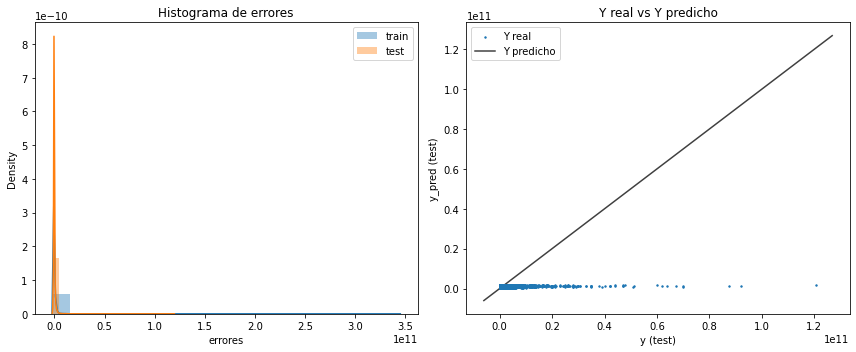

In [230]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.title('Histograma de errores')
sn.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sn.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y_test,y_test_pred, s =2, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Y predicho')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.legend()
plt.tight_layout()
plt.show()